# Linear Classifiers in Python 
Michael (Mike Gelbart) - UBC

## Applying logistic regression and SVM

### scikit-learn refresher 

Assumed knowledge

In this course we'll assume you have some prior exposure to:
- Python, at the level of Intermediate Python for Data Science
- scikit-learn, at the level of Supervised Learning with scikitlearn
- supervised learning, at the level of Supervised Learning with scikit-learn

Fitting and predicting

In [ ]:
import sklearn.datasets
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

X.shape
# (11314, 130107)

y.shape
# (11314,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X,y)

y_pred = knn.predict(X)

Model evaluation

In [ ]:
knn.score(X,y)
# 0.99991 (we want to know how to generalize)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) #default is for 0.25 test

knn.fit(X_train, y_train)

knn.score(X_test, y_test)
# 0.66242 (much lower)

In [ ]:
#Example
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

# <script.py> output:
#     Prediction for test example 0: 1.0

### Applying logistic regression and SVM 

Using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #instantiate
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

LogisticRegression example

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)
# 0.972 #accuracy

lr.predict_proba(wine.data[:1])
# array([[ 9.951e-01, 4.357e-03, 5.339e-04]]) #probability of the first class??

Using LinearSVC

LinearSVC works the same way:

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)
# 0.893

Using SVC

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.svm import SVC
svm = SVC() # default hyperparameters  by default is a non linear. may be overfitting
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)
# 1.

Model complexity review:
- Underfitting: model is too simple, low training accuracy
- Overing: model is too complex, low test accuracy

In [ ]:
#Example
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

# <script.py> output:
#     0.9985152190051967
#     0.9622222222222222
#     1.0
#     0.4

In [ ]:
#Example
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

# <script.py> output:
#     Review: LOVED IT! This movie was amazing. Top 10 this year.
#     Probability of positive review: 0.8079007873616059
#     Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
#     Probability of positive review: 0.5855117402793947

### Linear classifiers 

Linear decision boundaries (linear and non linear)
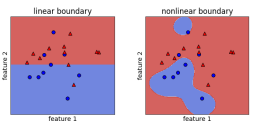

Definitions

Vocabulary:
- classification: learning to predict categories decision boundary: the surface separating different predicted classes
- linear classier: a classier that learns linear decision boundaries
    - e.g., logistic regression, linear SVM
- linearly separable: a data set can be perfectly explained by a linear classier

Linearly separable data
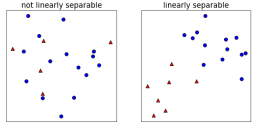

In [ ]:
#Example
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
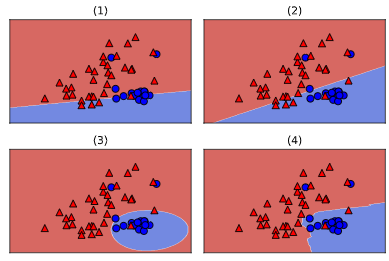

## Loss functions 

### Linear classifiers: the coefficients 

Dot Products

In [ ]:
x = np.arange(3)
x
# array([0, 1, 2])

y = np.arange(3,6)
y
# array([3, 4, 5])

x*y
# array([0, 4, 10])

np.sum(x*y)
# 14

x@y
# 14

- x@y is called the dot product of x and y , and is written x ⋅ y

Linear classifier prediction
- raw model output = coefficients ⋅ features + intercept
- Linear classier prediction: compute raw model output, check the sign
    - if positive, predict one class
    - if negative, predict the other class
- This is the same for logistic regression and linear SVM
    - fit is different but predict is the same

How LogisticRegression makes predictions

raw model output = coefficients ⋅ features + intercept

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)
lr.predict(X)[10]
# 0

lr.predict(X)[20]
# 1

In [ ]:
lr.coef_ @ X[10] + lr.intercept_ # raw model output
# array([-33.78572166]) #as it is negative, it predics as 0

lr.coef_ @ X[20] + lr.intercept_ # raw model output
# array([ 0.08050621])

The raw model output
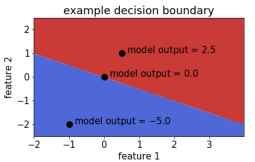
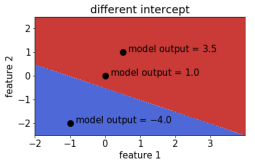
The two points for all examples are the same, but the intercept is different for the first two models
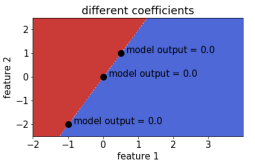
The last one changes the coefficients

In [ ]:
#Example
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

In [ ]:
#Example (interactive)

# Set the coefficients
model.coef_ = np.array([[0,5]]) #first trial
model.coef_ = np.array([[2,5]]) #second trial
model.coef_ = np.array([[0,5]]) #third trial
model.coef_ = np.array([[0,5]]) #fourth trial

model.intercept_ = np.array([0]) #first trial
model.intercept_ = np.array([0]) #second trial
model.intercept_ = np.array([2]) #third trial
model.intercept_ = np.array([10]) #fourth trial

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

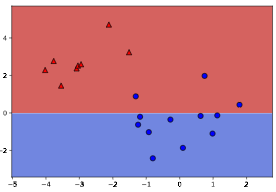
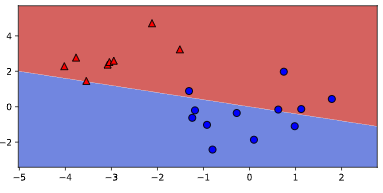
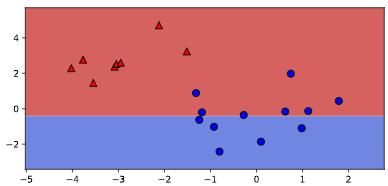
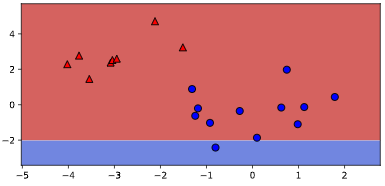

### What is a loss function? 

Least squares: the squared loss
- scikit-learn's LinearRegression minimizes a loss:
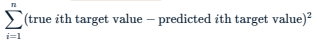
- Minimization is with respect to coecients or parameters of the model. (fit function minimized the loss)
- Note that in scikit-learn model.score() isn't necessarily the loss function.

Classification errors: the 0-1 loss
- Squared loss not appropriate for classication problems (more on this later).
- A natural loss for classication problem is the number of errors.
- This is the 0-1 loss: it's 0 for a correct prediction and 1 for an incorrect prediction.
- But this loss is hard to minimize! (in practice - logistic regression and svm normally do not do this)

Minimizing a loss

In [ ]:
from scipy.optimize import minimize

minimize(np.square, 0).x #grab the input value to make it small as possible. initial guess with 0 will result 0
# array([0.])

minimize(np.square, 2).x
# array([-1.88846401e-08])

In [ ]:
#Example
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

# <script.py> output:
#     [-9.16299112e-02  4.86754828e-02 -3.77698794e-03  2.85635998e+00
#      -2.88057050e+00  5.92521269e+00 -7.22470732e-03 -9.67992974e-01
#       1.70448714e-01 -9.38971600e-03 -3.92421893e-01  1.49830571e-02
#      -4.16973012e-01]
#     [-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
#      -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
#       1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
#      -4.16972624e-01]

### Loss function diagrams 

The raw model output
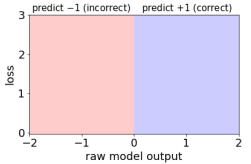

0-1 loss diagram (incorrect predictions have the weight of 1, and correct, 0)
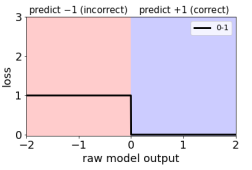

Linear regression loss diagram (loss is higher than the original value. There is a problem of predicting lerger than 1)
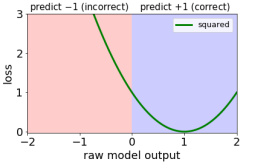

Logistic loss diagram
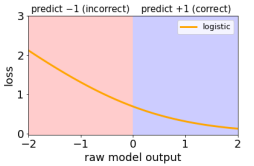

Hinge loss diagram (the diagrams capture the essence of logistic regression)
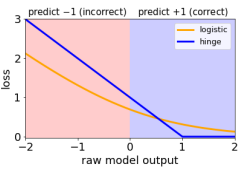

In [ ]:
#Example
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

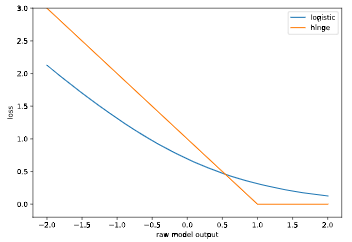

In [ ]:
#Example
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

# <script.py> output:
#     [ 1.03592182 -1.65378492  4.08331342 -9.40923002 -1.06786489  0.07892114
#      -0.85110344 -2.44103305 -0.45285671  0.43353448]
#     [[ 1.03731085 -1.65339037  4.08143924 -9.40788356 -1.06757746  0.07895582
#       -0.85072003 -2.44079089 -0.45271     0.43334997]]

## Logistic regression 

### Logistic regression and regularization 

Regularized logistic regression (smaller C (hyperparameter) is more regularization)
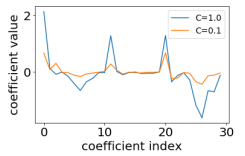

How does regularization affect training accuracy?

In [ ]:
lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=0.01) #penalizes amount of features. minimizes traing accuracy

lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

lr_weak_reg.score(X_train, y_train)
lr_strong_reg.score(X_train, y_train)

# 1.0
# 0.92

regularized loss = original loss + large coefficient penalty
- more regularization: lower training accuracy

How does regularization affect test accuracy?

In [ ]:
lr_weak_reg.score(X_test, y_test)
# 0.86

lr_strong_reg.score(X_test, y_test)
# 0.88

regularized loss = original loss + large coefficient penalty
- more regularization: lower training accuracy
- more regularization: (almost always) higher test accuracy

L1 vs. L2 regularization
- Lasso = linear regression with L1 regularization (helps with feature selection)
- Ridge = linear regression with L2 regularization
- For other models like logistic regression we just say L1, L2, etc

In [ ]:
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression() # penalty='l2' by default

#due to regularization, it is a good practice to scale the features
lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

plt.plot(lr_L1.coef_.flatten()) #performs feature selection
plt.plot(lr_L2.coef_.flatten())

L2 vs. L1 regularization
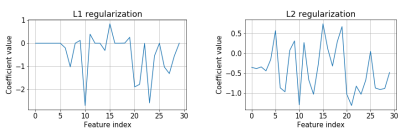

In [ ]:
#Example
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

#Congrats! As you can see, too much regularization (small C) doesn't work well - due to underfitting - 
#and too little regularization (large C) doesn't work well either - due to overfitting.

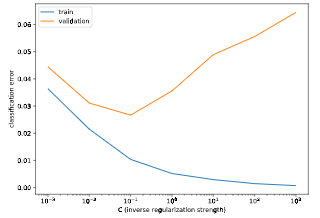

In [ ]:
#Example
# Specify L1 regularization
lr = LogisticRegression(penalty = "l1")

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# <script.py> output:
#     Best CV params {'C': 1}
#     Total number of features: 2500
#     Number of selected features: 1220

In [ ]:
#Example
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# <script.py> output:
#     Most positive words: favorite, superb, noir, knowing, loved, 
    
#     Most negative words: disappointing, waste, worst, boring, lame,

### Logistic regression and probabilities 

Until now, hard predictions (0 or 1), now, will be a probability

Logistic regression probabilities
- Without regularization (C = 10$^{8}$):
- model coefficients:
    - [[1.55 1.57]]
- model intercept: 
    - [-0.64]
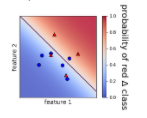
50% is the threshold - C is large

- With regularization (C = 1): (turn it on)
- model coefficients:
    - [[0.45 0.64]] (smaller, as expected)
    - ratio of coefficients give us the slope of the line and the magnitude, the confidence levels
- model intercept: 
    - [-0.26]
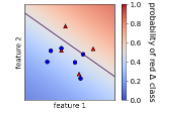

How are these probabilities computed?
- logistic regression predictions: sign of raw model output
- logistic regression probabilities: "squashed" raw model output (to be between 0 and 1 - sigmoid curve helps us)
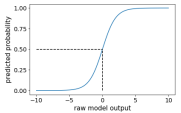

In [ ]:
#Example
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

# <script.py> output:
#     Maximum predicted probability 0.9761229966765974

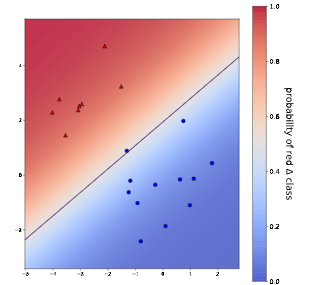

In [ ]:
#Example
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

#<script.py> output:
#     Maximum predicted probability 0.8990965659596716

#description
# You got it! As you probably noticed, smaller values of C lead to less confident predictions. 
# That's because smaller C means more regularization, which in turn means smaller coefficients, 
# which means raw model outputs closer to zero and, thus, 
# probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. 
# That's quite a chain of events!

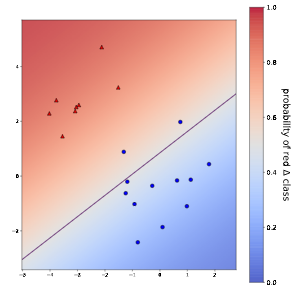

In [ ]:
#Example
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

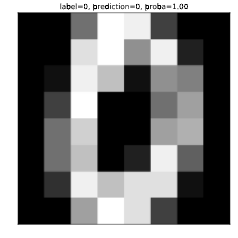
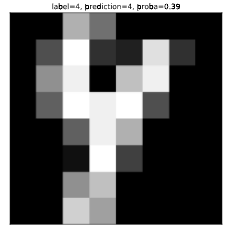

### Multi-class logistic regression 

- Multi-class classification means to have more than two classes (more than 0 and 1)
- Combining binary classifiers with one-vs-rest

In [ ]:
#one-vs-rest strategy
lr0.fit(X, y==0) #True for y == 0 and otherwise
lr1.fit(X, y==1)
lr2.fit(X, y==2)

# get raw model output
lr0.decision_function(X)[0] #more confident than any other class. more confident to be 0 than any of the others
# 6.124
lr1.decision_function(X)[0]
# -5.429
lr2.decision_function(X)[0]
# -7.532

lr.fit(X, y)
lr.predict(X)[0]
# 0

One-vs-rest:
- fit a binary classier for each class
- predict with all, take largestoutput
- pro: simple, modular
- con: not directly optimizing accuracy
- common for SVMs as well
- can produce probabilities

"Multinomial" or "softmax":
- fit a single classier for all classes
- prediction directly outputs best class
- con: more complicated, new code
- pro: tackle the problem directly
- possible for SVMs, but less common
- can produce probabilities

Model coefficients for multi-class

In [ ]:
# one-vs-rest by default
lr_ovr = LogisticRegression()

lr_ovr.fit(X,y)

lr_ovr.coef_.shape
# (3,13)

lr_ovr.intercept_.shape
# (3,)

In [ ]:
lr_mn = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs") #Non default solver. specify the algorithm do minimize the loss. multinomial require another one

lr_mn.fit(X,y)

lr_mn.coef_.shape
# (3,13)

lr_mn.intercept_.shape
# (3,)

In [ ]:
#Example
# If you fit a logistic regression model on a classification problem with 3 classes and 100 features, 
# how many coefficients would you have, including intercepts?
#answer: 303

In [ ]:
#Example
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

# <script.py> output:
#     OVR training accuracy: 0.9948032665181886
#     OVR test accuracy    : 0.9644444444444444
#     Softmax training accuracy: 1.0
#     Softmax test accuracy    : 0.9688888888888889

In [ ]:
#Example
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C = 100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

# <script.py> output:
#     Softmax     training accuracy: 0.996
#     One-vs-rest training accuracy: 0.916

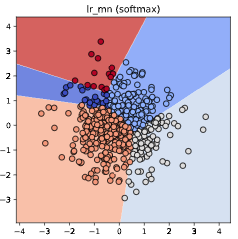
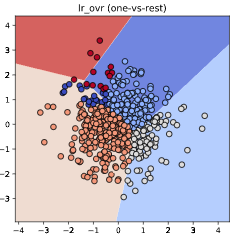
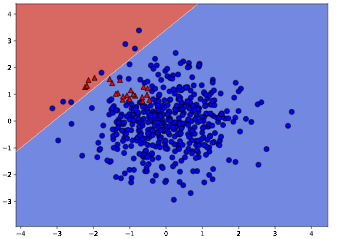

In [ ]:
#Example
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_train, y_train == 1, svm_class_1)

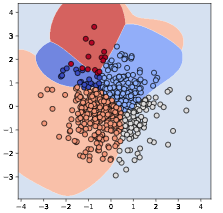
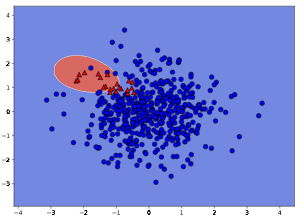

## Support Vector Machines 

### Support vectors 

What is an SVM?
- Linear classifiers (so far)
- Trained using the hinge loss and L2 regularization
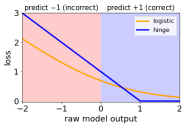
- Support vector: a training example not in the at part of the loss diagram
- Support vector: an example that is incorrectly classified or close to the boundary
- If an example is not a support vector, removing it has no effect on the model (all data points metter to the fit)
- Having a small number of support vectors makes kernel SVMs really fast
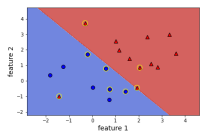

Max-margin viewpoint
- The SVM maximizes the "margin" for linearly separable datasets
- Margin: distance from the boundary to the closest points
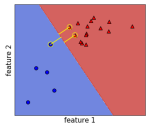
Unfortunatly, most data datasets are not separable by a margin

In [ ]:
#Example
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

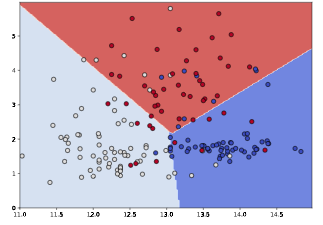
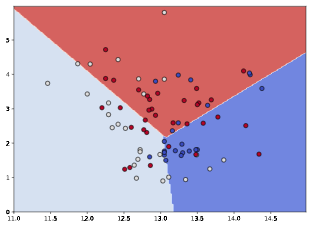

### Kernel SVMs 

Transforming your features
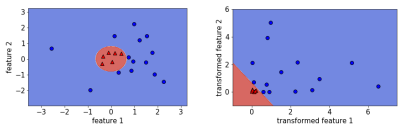
transformed feature = (original feature)$^{2}$
(get an elipse) - it is linear for the $^{2}$ but not when getting back to the original dimension

In [ ]:
from sklearn.svm import SVC #allow different kernels
svm = SVC(gamma=2) # default is kernel="rbf"

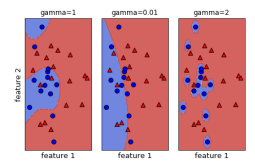
- smaller gamma leads to smoother boundaries
- larger gamma leads to more complex boundaries

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# <script.py> output:
#     Best CV params {'gamma': 0.001}

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# <script.py> output:
#     Best CV params {'C': 10, 'gamma': 0.0001}
#     Best CV accuracy 0.9988864142538976
#     Test accuracy of best grid search hypers: 0.9988876529477196

### Comparing logistic regression and SVM (and beyond)

Logistic regression:
- Is a linear classier
- Can use with kernels, but slow
- Outputs meaningful probabilities
- Can be extended to multiclass
- All data points aect t
- L2 or L1 regularization

Support vector machine (SVM):
- Is a linear classier
- Can use with kernels, and fast
- Does not naturally output probabilities
- Can be extended to multiclass
- Only "support vectors" affect fit
- Conventionally just L2 regularization

Use in scikit-learn

Logistic regression in sklearn:
- linear_model.LogisticRegression

Key hyperparameters in sklearn:
- C (inverse regularization strength)
- penalty (type of regularization)
- multi_class (type of multi-class)

SVM in sklearn:
- svm.LinearSVC and svm.SVC (linear vs kernel linear svc is faster then using SVC and using the parameter linear)

Key hyperparameters in sklearn:
- C (inverse regularization strength)
- kernel (type of kernel)
- gamma (inverse RBF smoothness)

SGDClassifier (stochastic gradient descent)
- SGDClassifier : scales well to large datasets

In [ ]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss='log') #for logistic
linsvm = SGDClassifier(loss='hinge')

- SGDClassifier hyperparameter alpha is like 1/C (bigger alpha means more regularization)

In [ ]:
#Example
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':["hinge", "log"], 'penalty':["l1", "l2"]}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# <script.py> output:
#     Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
#     Best CV accuracy 0.94351630867144
#     Test accuracy of best grid search hypers: 0.9592592592592593

### Conclusion 

How does this course fit into data science?
- Data science
- → Machine learning
- →→ Supervised learning
- →→→ Classification (categorical output)
- →→→→ Linear classifiers (this course)